### I. Import Various Libraries, Read in data and Remove Data Errors

In [144]:
import time
import pandas as pd
from datetime import datetime,timedelta
import statsmodels.api as sm
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker
from matplotlib.finance import candlestick2_ohlc
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
%matplotlib inline

In [70]:
df=pd.read_csv('C:/Users/yuy/Documents/GitHub/try/xyz/data.1_min.csv',header=None,names=('time','price'))
df.head()

,time,price
0,1990-01-08 15:32:00,411.25
1,1990-01-08 15:33:00,411.25
2,1990-01-08 15:34:00,411.75
3,1990-01-08 15:35:00,411.50
4,1990-01-08 15:36:00,411.50


In [71]:
df.time[0]
datetime.strptime(df.time[0],'%Y-%m-%d %H:%M:%S')

datetime.datetime(1990, 1, 8, 15, 32)

In [72]:
df.time=[datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in df.time]

In [73]:
type(df.time[0])

pandas.tslib.Timestamp

In [83]:
df=df.set_index('time')

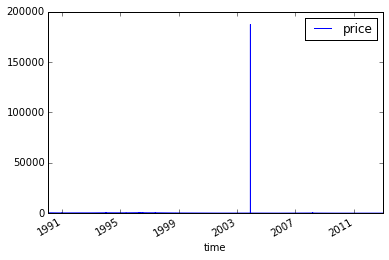

In [84]:
#plotting it along time line, found an outlier
df.plot()

In [86]:
#replace the price point with price in the previous minute. 
temp=df[df['price']>5000].index
df.loc[temp,'price']=df.loc[temp+timedelta(minutes=1),'price']

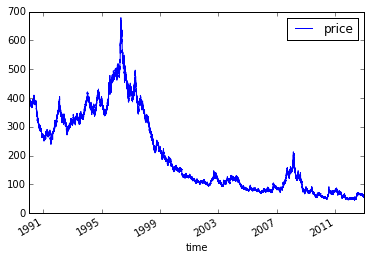

In [87]:
#check to see whether outliers are all removed
df.plot()

In [88]:
#check for duplications
df.index.is_unique

True

In [123]:
df_daily=df.resample('B',how='ohlc')
df_daily.head(10)
df_daily.dropna(how='any',axis=0,inplace=True)

In [90]:
o=df_daily['price']['open']
c=df_daily['price']['close']
h=df_daily['price']['high']
l=df_daily['price']['low']
#d=df_daily.index[0:50].strftime('%Y-%m-%d').reshape(50,1)
#d=df_daily.index[0:50].strftime('%Y-%m-%d').reshape(50,1)
#quote=np.concatenate((d,o,c,h,l,np.zeros(50).reshape(50,1)),axis=1)
a=range(len(df_daily.index))
new=[]
for i in a:
    if i%365==0:
      new.append(i)  
x=df_daily.index.strftime('%Y')

C:\Users\yuy\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



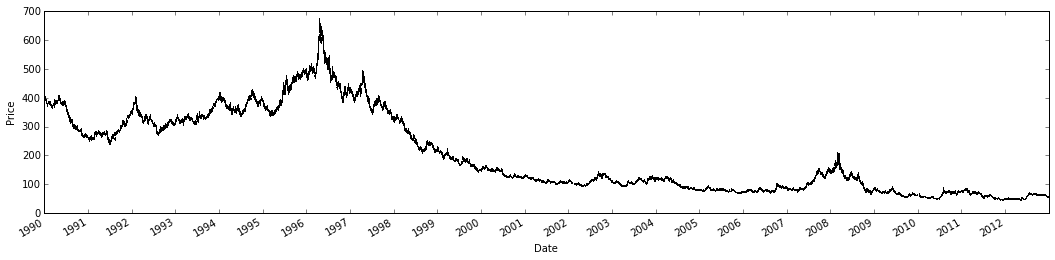

In [91]:
fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(1,1,1)
# every 3rd month
#months = MonthLocator(df_daily.index[0:10], bymonthday=1, interval=1)
#monthsFmt = DateFormatter("%b '%y")
#ax1.xaxis.set_major_locator(months)
#ax1.xaxis.set_major_formatter(monthsFmt)
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(new,x[new], rotation=45)
candlestick2_ohlc(ax1,o,h,l,c,width=1,colorup='k',colordown='r')
ax1.autoscale_view()
fig.autofmt_xdate()

In [124]:
df_daily['log_returns_close']= np.log(df_daily['price']['close']) - np.log(df_daily['price']['close'].shift(1))

In [127]:
df_daily.drop(df_daily.head(1).index,inplace=True)

In [128]:
df_daily.head(10)

price                         log_returns_close
              open    high     low   close                  
time                                                        
1990-01-09  408.25  408.50  406.25  406.75         -0.007958
1990-01-10  406.00  406.25  403.25  405.50         -0.003078
1990-01-11  406.75  407.00  403.25  404.50         -0.002469
1990-01-12  406.75  406.75  400.75  402.00         -0.006200
1990-01-15  401.25  401.50  397.75  399.00         -0.007491
1990-01-16  399.50  401.00  397.75  398.00         -0.002509
1990-01-17  397.50  401.00  397.50  401.00          0.007509
1990-01-18  402.00  402.00  396.25  397.50         -0.008766
1990-01-19  397.00  397.00  392.00  392.00         -0.013933
1990-01-22  391.75  394.00  391.25  392.50          0.001275

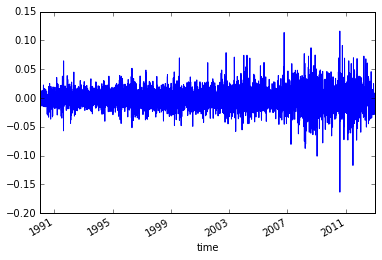

In [129]:
df_daily['log_returns_close'].plot()

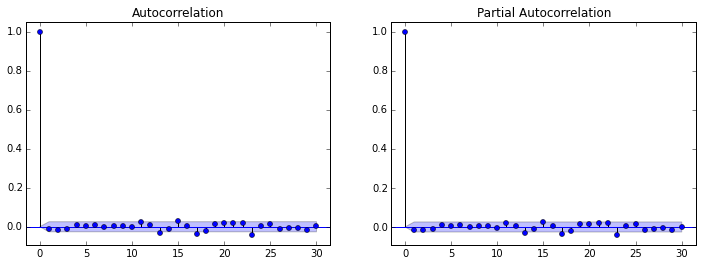

In [151]:
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
ax1=sm.graphics.tsa.plot_acf(df_daily['log_returns_close'],lags=30,ax=ax1)
ax2=fig.add_subplot(122)
ax2=sm.graphics.tsa.plot_pacf(df_daily['log_returns_close'],lags=30,ax=ax2)

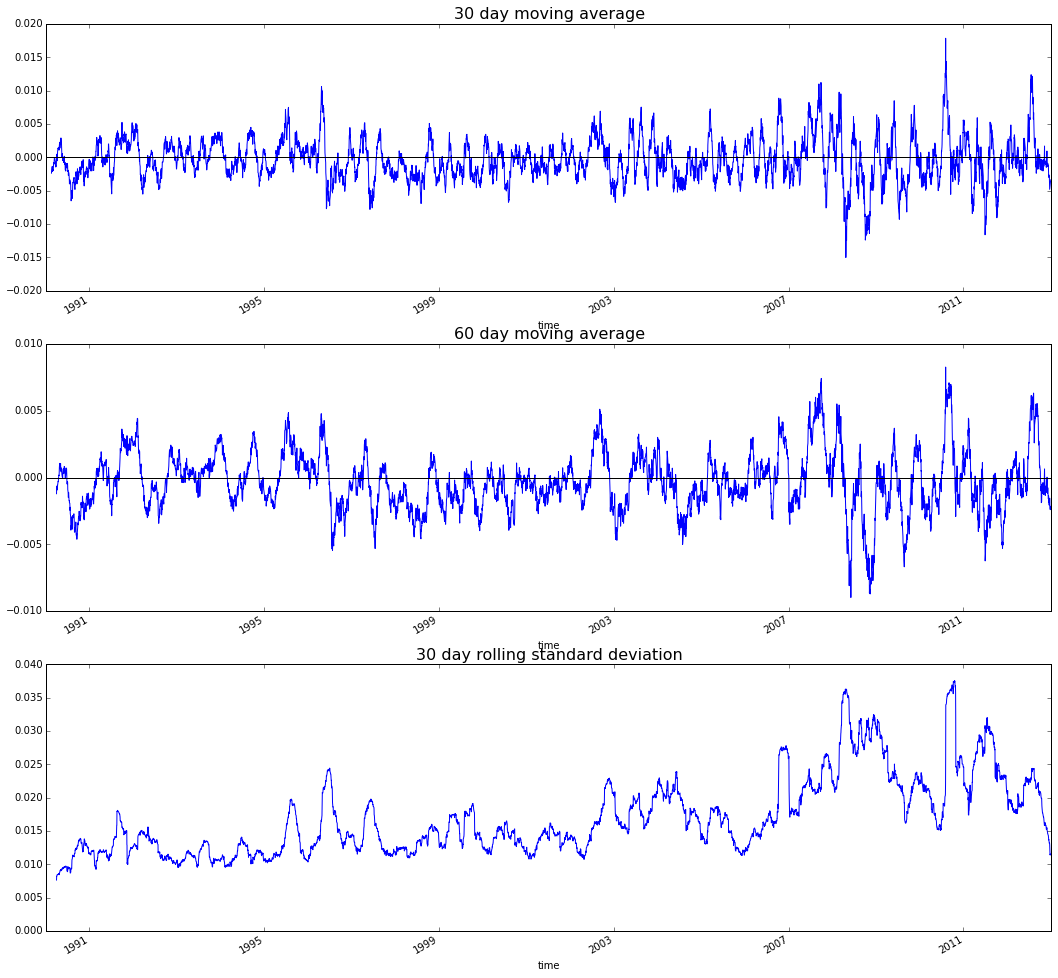

In [166]:
fig=plt.figure(figsize=(18,18))
ax1=fig.add_subplot(311)
ax1.set_title('30 day moving average',fontsize=16)
ax1=pd.rolling_mean(df_daily['log_returns_close'],30).plot()
ax1=plt.axhline(y=0,color='black')

ax2=fig.add_subplot(312)
ax2.set_title('60 day moving average',fontsize=16)
ax2=pd.rolling_mean(df_daily['log_returns_close'],60).plot()
ax2=plt.axhline(y=0,color='black')

ax3=fig.add_subplot(313)
ax3.set_title('30 day rolling standard deviation',fontsize=16)
ax3=pd.rolling_std(df_daily['log_returns_close'],60).plot()

It seems that the volativity increased over time and that should be incorporated into the model building. 